In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('..')

In [2]:
folder_path = 'data_nasdaq_csv'

In [3]:
dataframes = []
company_names = []

In [4]:
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    Ticker = filename.split(".")[0]
    company_names.append(Ticker)
    if os.path.isfile(file_path) and file_path.endswith(".csv"):
        try:
            df = pd.read_csv(file_path)
            df = df.assign(Ticker=Ticker)  # add company name column
            if df['Close'].isnull().sum() == 0:
                dataframes.append(df)
        except pd.errors.ParserError as e:
            print(f"Error in file {file_path}: {e}. Skipping file.")
        except Exception as e:
            print(f"Error in file {file_path}: {e}. Skipping file.")


Error in file data_nasdaq_csv/LRCX.csv: Error tokenizing data. C error: Expected 7 fields in line 4926, saw 9
. Skipping file.


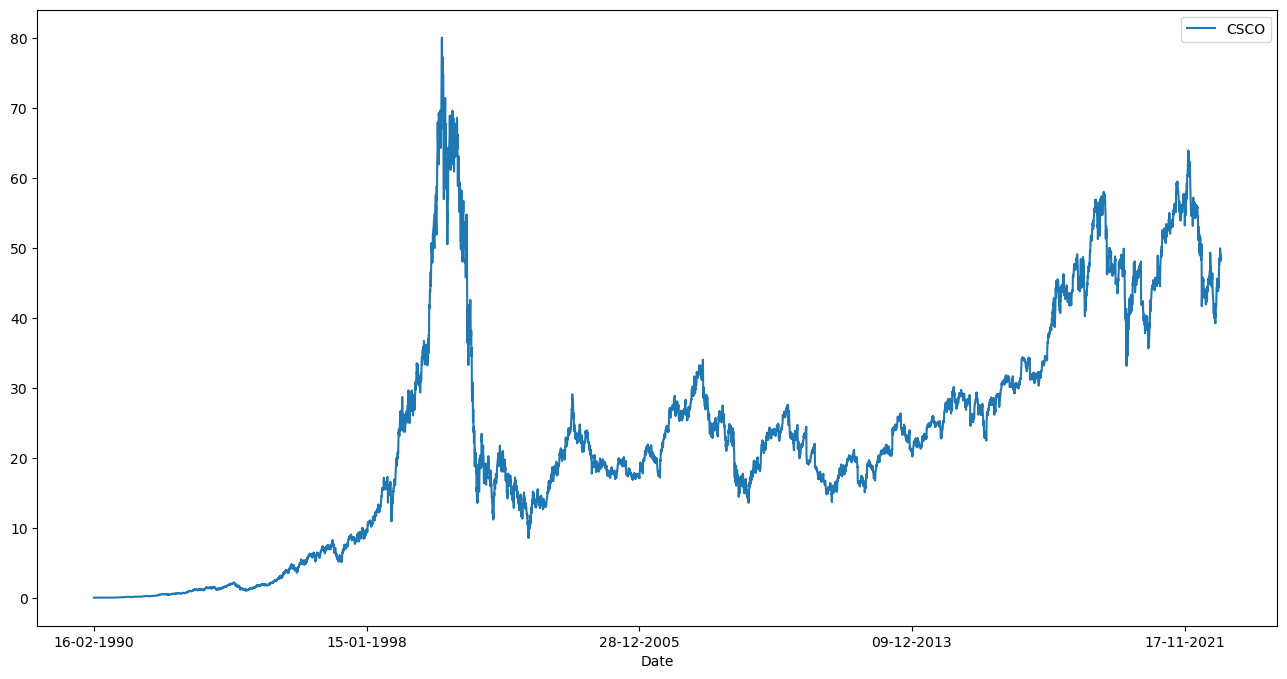

In [5]:
df_1 = dataframes[0] # Get the first dataframe
df_1.plot(x='Date', y='Close', label=df_1['Ticker'].iloc[0], figsize = (16,8))
plt.show()

In [6]:
dataframes[0]

,Date,Low,Open,Volume,High,Close,Adjusted Close,Ticker
0,16-02-1990,0.073785,0.000000,940636800,0.079861,0.077257,0.054863,CSCO
1,20-02-1990,0.074653,0.000000,151862400,0.079861,0.079861,0.056712,CSCO
2,21-02-1990,0.075521,0.000000,70531200,0.078993,0.078125,0.055479,CSCO
3,22-02-1990,0.078993,0.000000,45216000,0.081597,0.078993,0.056095,CSCO
4,23-02-1990,0.078125,0.000000,44697600,0.079861,0.078559,0.055787,CSCO
...,...,...,...,...,...,...,...,...
8264,06-12-2022,48.259998,49.439999,15443800,49.439999,48.590000,48.590000,CSCO
8265,07-12-2022,48.060001,48.400002,15171700,48.549999,48.180000,48.180000,CSCO
8266,08-12-2022,48.619999,48.660000,16015800,49.200001,48.990002,48.990002,CSCO
8267,09-12-2022,48.439999,49.099998,14302000,49.169998,48.459999,48.459999,CSCO


In [7]:
dataframes[0]['Date'][0]

'16-02-1990'

In [8]:
df = pd.concat([df for df in dataframes if (pd.to_datetime(df['Date'][0], format='%d-%m-%Y') <= pd.Timestamp('01-01-2008'))])
df_copy = df[pd.to_datetime(df['Date'], format='%d-%m-%Y') >= pd.Timestamp('01-01-2019')].copy()


In [9]:
df_copy

,Date,Low,Open,Volume,High,Close,Adjusted Close,Ticker
7274,02-01-2019,42.209999,42.279999,23833500,43.200001,42.950001,38.037750,CSCO
7275,03-01-2019,40.959999,42.299999,29606700,42.410000,41.070000,36.654400,CSCO
7276,04-01-2019,41.529999,41.849998,27515000,43.000000,42.919998,38.305492,CSCO
7277,07-01-2019,42.759998,42.860001,19488100,43.650002,43.209999,38.564316,CSCO
7278,08-01-2019,43.099998,43.570000,22071400,43.939999,43.560001,38.876686,CSCO
...,...,...,...,...,...,...,...,...
4296,06-12-2022,1.700000,1.730000,62200,1.740000,1.730000,1.730000,BWEN
4297,07-12-2022,1.710000,1.720000,66600,1.750000,1.720000,1.720000,BWEN
4298,08-12-2022,1.710000,1.720000,37500,1.750000,1.730000,1.730000,BWEN
4299,09-12-2022,1.720000,1.730000,23500,1.750000,1.730000,1.730000,BWEN


In [10]:
df_copy.nunique()

Date                 995
Low                60671
Open               60002
Volume            103178
High               61531
Close              61077
Adjusted Close    369520
Ticker              1030
dtype: int64

In [11]:
df_copy.isnull().any()

Date              False
Low               False
Open              False
Volume            False
High              False
Close             False
Adjusted Close    False
Ticker            False
dtype: bool

In [12]:
### Split the dataset into time windows to get data samples.

X_data = []
y_data = []
dates = []
window_size = 30 # Time window for data feature (size of 'number of days') to learn.

# Only get the open price (index 2 in the data frame)
for i in range(1, len(df) - window_size - 1):
    first = df.iloc[i, 0]
    data_feature = []
    data_label = []
    
    # Get a window_size time frame for data feature
    for j in range(window_size):
        data_feature.append(df.iloc[i + j, 0])
        
    # Next value is the label (price of the next day) to be predicted
    data_label.append(df.iloc[i + window_size, 0])
    
    # Append new data sample (feature and label) to X_data and y_data
    X_data.append(np.array(data_feature).reshape(window_size, 1))
    y_data.append(np.array(data_label))
    dates.append(df.iloc[i + window_size, :].name)


KeyboardInterrupt: 

In [ ]:
X_data[0]

In [ ]:
import tensorflow as tf
from tf.keras.models import Sequential
from tf.keras.layers import LSTM, Dropout, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(30, 1), activation='relu'))  # LSTM layer with 128 units
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(LSTM(64, activation='relu'))  # LSTM layer with 64 units
model.add(Dense(32, activation='relu'))  # Dense layer with 32 units and ReLU activation
model.add(Dense(1))  # Dense output layer with 7 units